# Introduction to Graphical Exploratory Data Analysis

> "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone." -- John Tukey

In this chapter we will explore the basics of graphical exploratory data analysis techniques. As they a picture can speak thousand words. Let's jump right into it.

## Plotting a histogram

One of the basic methods of graphical exploratory data analysis is to plot histogram on the data we are trying to analyze. This gives us a quick feel of the data. For our initial practice, we will use a classic dataset collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in the history. Anderson carefully measured anatomical properties of the samples of three different species of iris, *Iris Sentosa*, *Iris versicolor* and *Iris virginica*. This full dataset is available as part of `Scikit-Learn`. Let's get the data. 

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(F"Target names: {iris.target_names}")
print(F"Feature names: {iris.feature_names}")
print(F"Dataset size: {iris.data.shape}")

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset size: (150, 4)


We will plot distribution of the versicolor petal length as a histogram. Let's first get that into a variable.

In [2]:
import numpy as np
petal_length = iris.data[:, 2]
versicolor_petal_length_indices = np.where(iris.target == 1)
versicolor_petal_length = petal_length[versicolor_petal_length_indices]

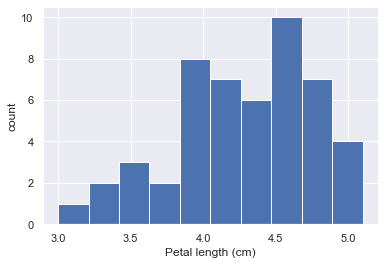

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt  
sns.set()

_ = plt.hist(versicolor_petal_length)
_ = plt.xlabel("Petal length (cm)")
_ = plt.ylabel("count")
_ = plt.show()

The histogram has 10 bins by default, and the count tells us how many of the values from the dataset lies in that bin. For instance, for length 5.0 cm, we have count of 4. Let's change the number of bins.

***Square root rule of choosing bins***: The "square root rule" is the commonly used rule of thumb for choosing the number of bins: choose the number of bins to be square root of the number of samples.  

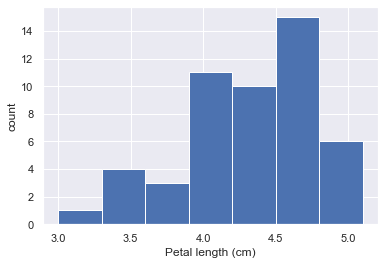

In [4]:
n_data = len(versicolor_petal_length)
n_bins = int(np.sqrt(n_data))

_ = plt.hist(versicolor_petal_length, bins=n_bins)
_ = plt.xlabel("Petal length (cm)")
_ = plt.ylabel("count")
_ = plt.show()

Let's plot this in varying number of bins.


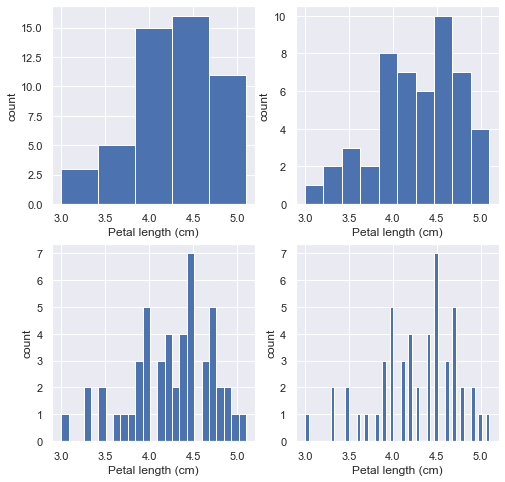

In [5]:
def plot_histogram(n_bins):
    _ = plt.hist(versicolor_petal_length, bins=n_bins)
    _ = plt.xlabel("Petal length (cm)")
    _ = plt.ylabel("count")
    
plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_histogram(5)
plt.subplot(222)
plot_histogram(10)
plt.subplot(223)
plot_histogram(25)
plt.subplot(224)
plot_histogram(50)

## Plotting all of the data: Bee Swarm plots.

The problem with histogram plots is that 
* Same data can look entirely different depending on how bins are chosen. Choice of bins is arbitrary. This leads to *binning bias*. In other words same data can be interpreted in entirely different way depending on the choice of bin.
* We are not plotting all of the data. We are putting data into bins, so we always lose some information, how much, this agains depends on choice of bins which is arbitrary.

To alleviate these problems, we can use ***Bee Swarm plots***. We plot all the data in Bee Swarm plots, so no information is lost and also there is no binning bias.

The quantitative information is laid out on the y-axis. On the other hand, x-axis contains the various features we are trying to compare. Note that the spread of data along x-axis has no meaning. Let's draw one to understand this better. First let's convert the data into a nice `pandas DataFrame`.


In [6]:
import pandas as pd

iris_df = pd.DataFrame(data=iris.data, index=None, columns=iris.feature_names)
# also add the target values, since Scikit-Learn dataset has it in target 
iris_df['species_num'] = iris.target

# Add another column species which will contain the categorical name for plotting
iris_df['species'] = iris_df['species_num']
iris_df['species'].replace([0, 1, 2], iris.target_names, inplace=True)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_num,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Now, let's plot

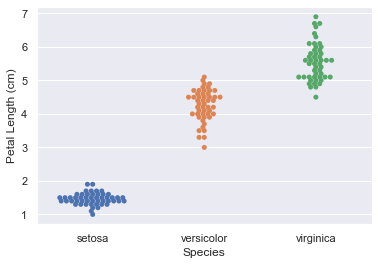

In [8]:
_ = sns.swarmplot(x='species', y='petal length (cm)', data=iris_df)
_ = plt.xlabel('Species')
_ = plt.ylabel('Petal Length (cm)')
_ = plt.show()

Nice, we can see every data point in the plot and we can see the variations. Clearly setosa has smaller petal width, then versicolor and then finally virginica. Note that the spread of the values along x-axis has no meaning. As you can guess, if there are lot of data points, this plot can become overwhelmingly confusing and will obfuscate the data. We can solve this problem by ***Empirical Cumulative Distribution Functions (ECDF)***.

## Empirical Cumulative Distribution Functions (ECDF)

ECDF is an estimator of the Cumulative Distribution Function. The ECDF allows you to plot a feature of your data from least to greatest and see whole feature as it is distributed across the dataset. The x-value of an ECDF is the qunatity you are trying to measure, and y-value on the other hand is the fraction of data points that have a smaller value than the corresponding x-value. We will understand it better with an example. Let's draw the plot first and then make sense of it. Note that this visualization utilizes all the data points too. 

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y
    

Let's draw ECDF plot for versicolor petal length.

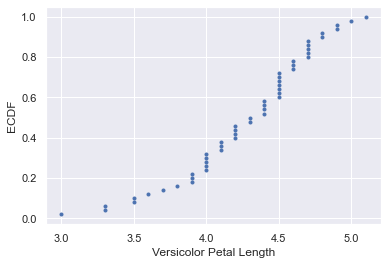

In [11]:
x_vers, y_vers = ecdf(versicolor_petal_length)
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.xlabel('Versicolor Petal Length')
_ = plt.ylabel('ECDF')
_ = plt.show()

Now, on x-axis we have plotted the quantity we wanted to measure. On y-axis we have put ECDF, which moves from $\frac{1}{n}$ to $n$ where $n$ is the size of the data. Any point on the plot represents what percentage of data points is less than what is on the x-axis. So for example, for x-axis 5.0, ~99% of the data is less than 5.0. Similarly, for point 3.6, almost 10% of data is less than 3.6. We can plot many features together to compare them. Let's try this for petal length of all the members of iris family.

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
setosa_petal_length = petal_length[np.where(iris.target == 0)]
virginica_petal_length = petal_length[np.where(iris.target == 2)]

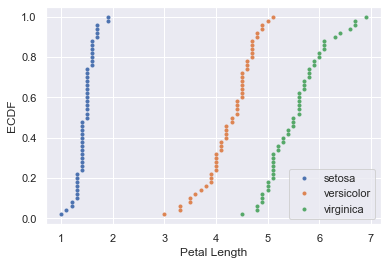

In [18]:
x_set, y_set = ecdf(setosa_petal_length)
x_vir, y_vir = ecdf(virginica_petal_length)
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_vir, y_vir, marker='.', linestyle='none')
_ = plt.xlabel('Petal Length')
_ = plt.ylabel('ECDF')
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.show()

As you can see, this is similar to Bee-Swarm plot to compare the feature but also it gives better detail for larger dataset too. We can clearly see Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

# Introduction to Summary Statistics

We have seen that the graphical plots (histogram, Bee-Swarm plot and the ECDF) provide effective summaries of the data, however sometimes we want to summarize the data even more succinctly in one or two numbers, then we use the summary statistics. Note that they are not subsitute of the EDA we have been learning, but they sometimes are useful to speak about data in as few points as possible to give a little glimpse of the data.

## Mean

Mean is sum of all the data points, divided by the number of points in dataset.

$$
    mean = \bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i}
$$

Mean is easy to calculate but it is susceptible to outliers. Outliers are datapoints whose value is far greater or less than most of the rest of the data.

Imagine a dataset where we have numbers like \[1, 2, 0, 2, 1000\]. In this case 1000 is an outlier. The mean of the dataset is 201, which doesn't effectively describe the dataset.

In `NumPy` mean is calculated by:

In [20]:
np.mean(versicolor_petal_length)

4.26

## Median

Median is the middle value of the sorted data. So we sort the data and choose the middle value. Since the median relies on it's position in the dataset but not on the values, it is immune to extreme values of the data set, in other words outliers have no impact on the median.

In [21]:
np.median(versicolor_petal_length)

4.35

## Percentiles, outliers and Box Plots.

The median is the special name for 50% percentile, In other words, 50% of the data are less than the median. Similarly 25th percentile is the value of datapoint that is greater than 25% of the data and so on. Percentile are useful summary statistics. Let's compute 25, 50 and 75 percentile of versicolor petal length

In [22]:
np.percentile(versicolor_petal_length, [25, 50, 75])

array([4.  , 4.35, 4.6 ])

Let's understand how percentiles relate to ECDF. We will plot percentiles of the *Iris versicolor* petal length along with ECDF. Remember that ECDF are between 0 and 1, so we have to scale our percentiles too between 0 and 1. First we will plot the ECDF and overlay the percentiles 2.5, 25, 50, 75, and 97.5 on that plot.

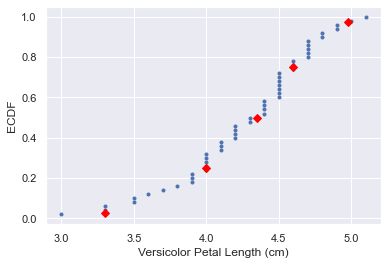

In [24]:
# ECDF plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.xlabel('Versicolor Petal Length (cm)')
_ = plt.ylabel('ECDF')

# Calculate various percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])
vers_percentiles = np.percentile(versicolor_petal_length, percentiles)
_ = plt.plot(vers_percentiles, percentiles/100, marker='D', color='red', linestyle='none')
_ = plt.show()

We can plot the percentiles graphically, this is where quantitative EDA meets graphical EDA. We use box plots using percentile to display some of the saliant features of the dataset. In the plot below, 

* Center of the box is the median, which is the 50% percentile of the data
* The edges of the boxes are $25^{th}$ and $75^{th}$ percentile (bottom and top respectively).
* This means that total height of the box is the middle 50% of the data and is called *Inter-Quartile Range* or *IQR*.
* The whiskers around the box extends to 1.5 times the IQR or to the extent of the data, whichever is more extreme.
* Finally, all points outside of the whiskers are plotted individually, and marked as outliers.

When number of data points are too large, and Bee Swarm plots are too cluttered, The box plots are the great alternative. Plotting a Box plot is almost same as Bee Swarm plots.

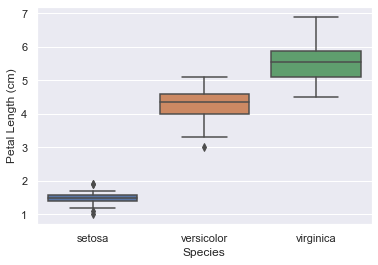

In [23]:
_ = sns.boxplot(x='species', y='petal length (cm)', data=iris_df)
_ = plt.xlabel('Species')
_ = plt.ylabel('Petal Length (cm)')
_ = plt.show()

One thing to remember that outlier often doesn't mean they are erroneous data points, sometimes they are valid points, and it depends on context. Imagine a case when you see a certain sensor value which shows temperature of a unit. If all datapoints from other sensor show sensible value but this one sensor show an outlier value, it might be possible that this sensor is faulty and it's values should be removed from dataset. However imagine we are looking at election data and looking at the vote share of counties in election, we may see some counties in a state entirely vote for either republicans or democrates and they might show a different value than rest of the state. As there is 0 evidence of election fraud in United States, this means that we just have valid outliers. 

## Variance and Standard Deviation

Variance is how we measure the spread or in other words, variability of the data. Clearly *setosa* has less spread than *virginica*. Formally it is the *mean squared distance of the data from their mean*. 

$$
\text{variance} = \sigma_{x}^{2} = \frac{1}{n}\sum^{n}_{i=1}(x_{i} - \bar{x})^2
$$

In other words, we calculate the distance of each data point from the mean, square it and then calculate the mean over all data points.

In [28]:
np.var(versicolor_petal_length)

0.21640000000000004

As the calculation of the variance involves squared quantities, it does not have the same unit as what we want to measure, for example, the variance we got for *versicolor petal length* is in square distance unit, rather than in distance unit. Therefore, we usually take square root of the variance which is called ***Standard Deviation***. Standard devision is a reasonable metric for typical spread of the data.
$$
\text{standard deviation} = \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}
$$

In [29]:
np.std(versicolor_petal_length)

0.4651881339845203

## Scatter Plots.

So far we have drawn swarm plots and ECDF plots which compared the petal length of various species. What if, we want to compare properties of a single species. That is when scatter plot come in handy.  As an example let's draw a scatter plot between *versicolor* petal length and it's width.

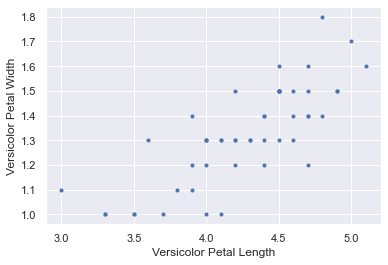

In [30]:
# let's first get the versicolor petal width in a numpy array
petal_width = iris.data[:, 3]
versicolor_petal_width = petal_width[np.where(iris.target == 1)]

# let's plot the scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')
_ = plt.xlabel('Versicolor Petal Length')
_ = plt.ylabel('Versicolor Petal Width')
_ = plt.show()

## Covariance

A measure of how two quantities vary together. The covariance is essentially mean of product of individiual distances of the qunatities from their mean.

$$
 \text{covariance} = S_{xy} = \frac{1}{n}\sum^{n}_{i=1}(x_{i} - \bar{x})(y_{i} - \bar{y})
$$

Variables are positively correlated when they grow together, anti-corelated other wise. Value of 0 means there is no correlation. We can see in the plot above as the length of versicolor petal length gets bigger, the width too gets bigger, that means versicolor petal length and petal width are positively correlated. Let's see it by calculating it using `numpy`

In [31]:
np.cov(versicolor_petal_length, versicolor_petal_width)

array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]])

What we see above is a covariance matrix. It is a square matrix, given by $C_{i, j} = \sigma(x_{i}, x_{j})$ So diagonal values is covariance of variable with itself, which is nothing but variance.  and other values represent the various pair of covariances. Also remember that covariance matrix is symmetric since $\sigma(x_{i}, x_{j}) = \sigma(x_{j}, x_{i})$ as you see in above matrix. values at \[0,1\] and \[1,0\] are same (which is 0.07310204) representing positive covariance of versicolor petal length and width.


## Pearson Correlation Coefficient

A general, more applicable measure to calculate how two variables depend on each other, we want it to be dimensionless, that is to not have any units.  Therefore, we divide the covariance with the standard deviation of the x and y.

$$
\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}
$$

$$
\rho = \frac{\text{variability due to codependence}}{\text{independent variability}}
$$

As it is dimensionless, it varies from -1 (for complete anticorrelation) to 1 (for complete correlation). Value of 0 means that there is no correlation.

In [32]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
pearson_r(versicolor_petal_length, versicolor_petal_width)
    

0.7866680885228169